## TEST ESTADISTICOS

---

In [7]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#Estadisticos
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
import statsmodels.api as sm

# Para que se desplieguen todas las columnas
pd.options.display.max_columns = None

In [2]:
df= pd.read_csv('../files/life_data_limp.csv', index_col=0)
df.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [3]:
# Creamos un df con las columnas numéricas
numericas = df.select_dtypes(include= np.number)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

---

### 1) ¿Qué diferencia existe el error de tipo I y el error de tipo II?

    Error de tipo I: la probabilidad de rechazar la H0 siendo verdadera

    Error de tipo II: la probabilidad de aceptar la H0 siendo falsa

---

### 2) ¿Qué es la asimetría?

    La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media

#### Método skew
Cuando utilizemos el método anterior podemos obtener resultados positivos, negativos o cero.

- **Distributión simétrica**: si el valor es de 0, los datos serán simétricos, y por lo tanto, tienen una distribución normal. 


- **Distribución asimétrica positiva**: si el valor es positivo, los datos serán asimétricos positivos, y por lo tanto, no son normales. 


- **Distribución asimétrica negativa**: si el valor es negativo, los datos serán asimétricos negativos, y por lo tanto, no son normales.

In [6]:
# Analizamos la asimetría de las variables numéricas
for i in numericas.columns:
    if skew(numericas[i])== 0:
        print( f" La variable {i} tiene una distribución SIMÉTRICA (Es normal)")
        print ("--------------------------------------------------------")
    elif skew(numericas[i])> 0:
        print( f" La variable {i} tiene una ASIMETRIA POSITIVA (No es normal)")
        print ("--------------------------------------------------------")
    elif skew(numericas[i])< 0:
        print( f" La variable {i} tiene una ASIMETRIA NEGATIVA (No es normal)")
        print ("--------------------------------------------------------")
    else:
        pass

 La variable year tiene una ASIMETRIA NEGATIVA (No es normal)
--------------------------------------------------------
 La variable life_expectancy tiene una ASIMETRIA NEGATIVA (No es normal)
--------------------------------------------------------
 La variable adult_mortality tiene una ASIMETRIA POSITIVA (No es normal)
--------------------------------------------------------
 La variable infant_deaths tiene una ASIMETRIA POSITIVA (No es normal)
--------------------------------------------------------
 La variable alcohol tiene una ASIMETRIA POSITIVA (No es normal)
--------------------------------------------------------
 La variable hepatitis_b tiene una ASIMETRIA NEGATIVA (No es normal)
--------------------------------------------------------
 La variable measles tiene una ASIMETRIA POSITIVA (No es normal)
--------------------------------------------------------
 La variable bmi tiene una ASIMETRIA NEGATIVA (No es normal)
--------------------------------------------------------
 La v

---

### 3) ¿Es vuestra variable respuesta asimétrica?

In [46]:
df['life_expectancy'].skew()

-0.6450474403780128

    La variable life expectancy tiene una distribución asimétrica negativa: el valor es menor a 0, por lo tanto, la media es menor que la mediana y la moda.


    La variable respuesta NO tiene Simetria.

---

### 4) ¿Qué tipo de curtosis presenta vuestra variable respuesta?

La curtosis determina el grado de concentración de los valores de una variable al rededor de la zona central de la distribución de frecuencia.

In [47]:
kurtosistest(df['life_expectancy'])

KurtosistestResult(statistic=-2.9173163927837944, pvalue=0.0035305744173524094)

    El pvalor de nuestra variable es menor a 0.05, por lo tanto rechazamos la H0. Los datos NO son normales.


---

### 5) ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente?

## Para todos los países

In [48]:
stats.shapiro(df["life_expectancy"])

ShapiroResult(statistic=0.9547738432884216, pvalue=3.436392262640181e-29)

`Al ser pvalue menor a 0.05 rechazamos la H0, por lo tanto nuestras datos NO tienen una distribución normal con un intervalo de confianza del 95%.`

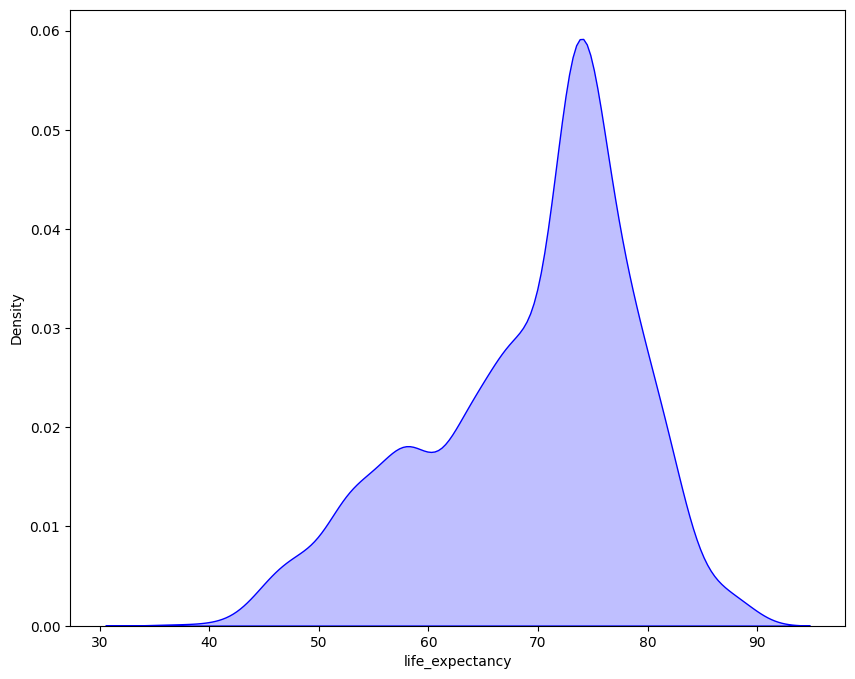

In [49]:
sns.distplot(
    df["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

`Datos no normales, la distribución no tiene forma de campana de Gauss.`

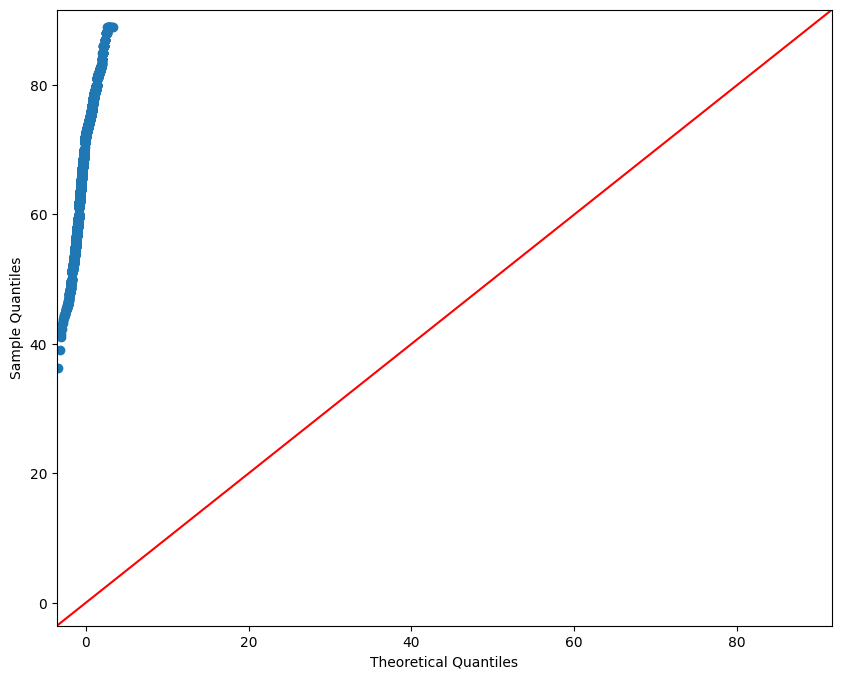

In [19]:
# Gráfico de cuantiles teóricos, compara la distribución de nuestros datos con la distribución de datos normal
sm.qqplot(df["life_expectancy"], line="45");

`Datos no normales, la distribución no sigue la línea de una distribución normal.`

---

## Análisis solo para los países en desarrollo.

In [10]:
df1= pd.read_csv('../files/endesarrollo.csv', index_col=0)
df1.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [11]:
df1.shape

(2410, 21)

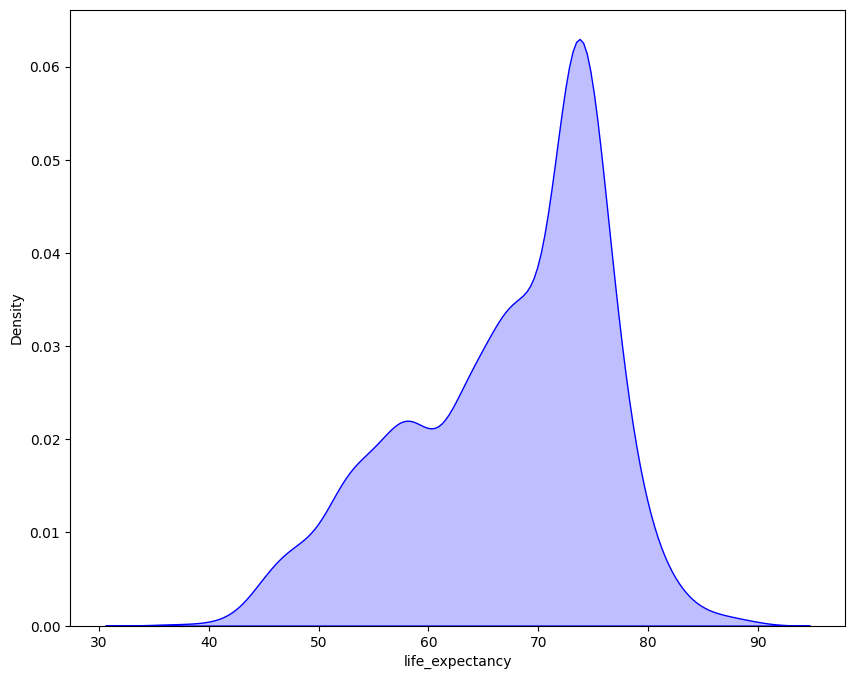

In [12]:
sns.distplot(
    df1["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

`Datos no normales, la distribución no tiene forma de campana de Gauss.`

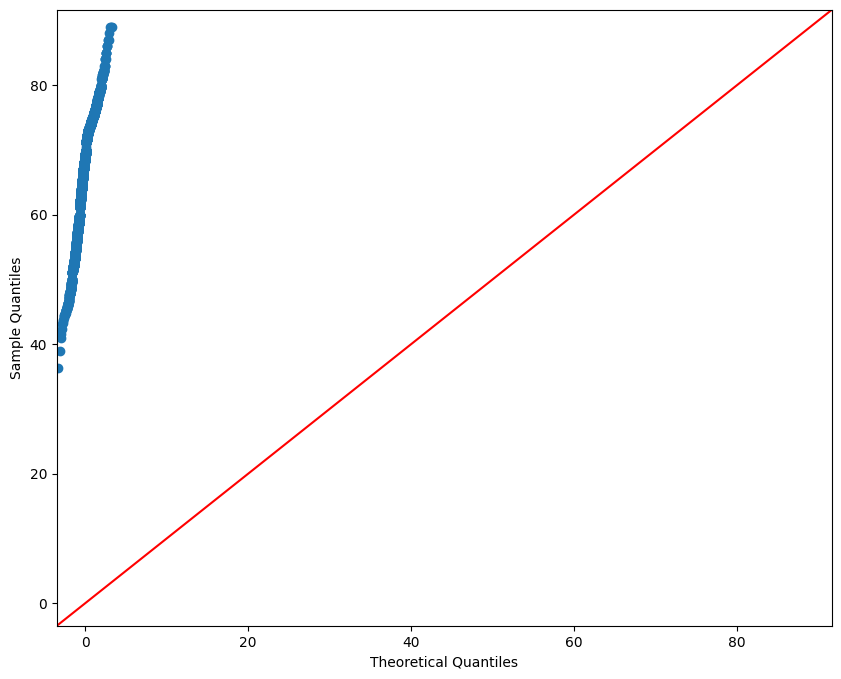

In [13]:
sm.qqplot(df1["life_expectancy"], line="45");

`Datos no normales, la distribución no sigue la línea de una distribución normal.`

In [53]:
df1['life_expectancy'].skew()

-0.6261669167348427

`Al ser pvalue menor a 0.05 rechazamos la H0, por lo tanto nuestras datos NO tienen una distribución normal con un intervalo de confianza del 95%.`

### Asimetría

In [54]:
kurtosistest(df1['life_expectancy'])

KurtosistestResult(statistic=-4.698075755729844, pvalue=2.6262402793189304e-06)

`p-valor menor 0.05 datos No son normales`.

In [55]:
stats.shapiro(df1["life_expectancy"])


ShapiroResult(statistic=0.9485048055648804, pvalue=2.829572663175081e-28)

`p-valor menor 0.05 datos No son normales.`

---

## Analisis para los países desarrollados.

In [14]:
df2= pd.read_csv('../files/desarrollados.csv', index_col=0)

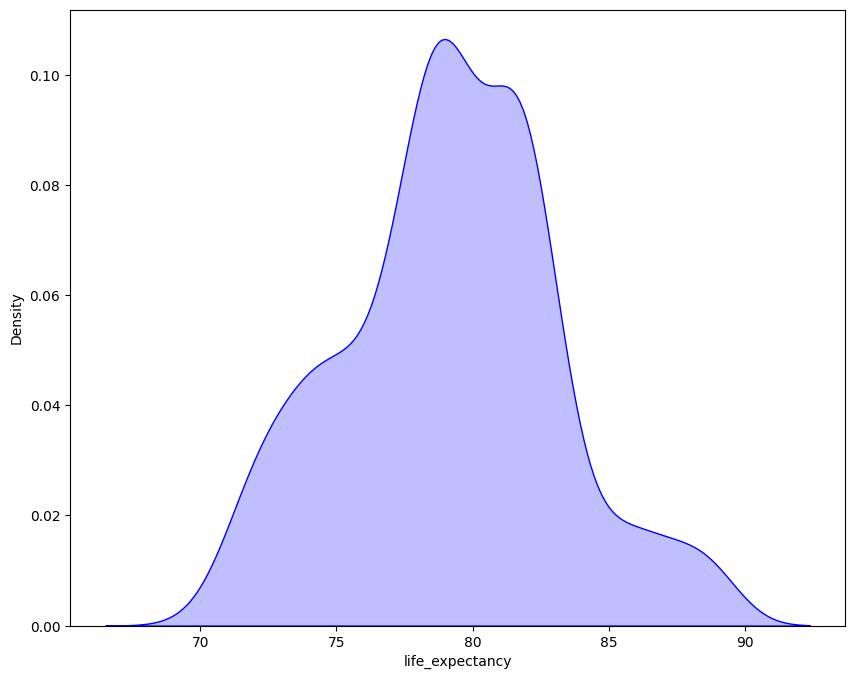

In [15]:
sns.distplot(
    df2["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

`Datos no normales, la distribución no tiene forma de campana de Gauss.`

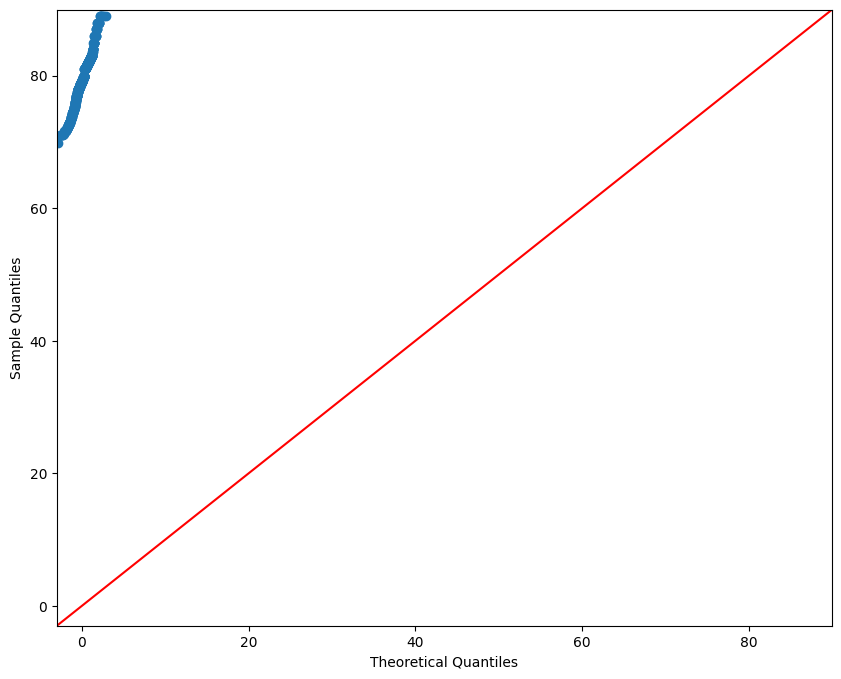

In [16]:
sm.qqplot(df2["life_expectancy"], line="45");

`Datos no normales, la distribución no sigue la línea de una distribución normal.`

In [17]:
kurtosistest(df2['life_expectancy'])

KurtosistestResult(statistic=-0.49256031313779486, pvalue=0.6223232958791044)

`p-valor mayor 0.05 datos son normales, tiene leptocurtosis.`

In [21]:
stats.shapiro(df2["life_expectancy"])

ShapiroResult(statistic=0.984403133392334, pvalue=2.6695464839576744e-05)

`p-valor menor a 0.05, por lo tanto, los datos No son normales`